In [1]:
import torch
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

DBLP Real node features

In [2]:
real_feature_path = '../features/dblp/real_node_features20.pt'
real_class_path = '../features/dblp/real_node_class20.pt'
syn_feature_path = '../features/dblp/sync499949232950/sync499949232950_node_features20.pt'
syn_class_path = '../features/dblp/sync499949232950/sync499949232950_node_class20.pt'

In [3]:
def apply_threshold(df):
    return df.applymap(lambda x: 0.0 if x<0.0 else 1.0)

In [4]:
def cosine_sim(original,sampled):
    return cosine_similarity(np.array(original), np.array(sampled))

In [5]:
node_feature_real = torch.load(real_feature_path).detach().numpy()
node_feature_real.shape

(20, 50)

In [6]:
df_real = pd.DataFrame(node_feature_real)
node_class_real = torch.load(real_class_path).detach().numpy()
node_class_real

array([2, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 3, 3, 2, 0, 0])

In [7]:
df_real['class'] = node_class_real

In [8]:
node_feature_syn = torch.load(syn_feature_path).detach().numpy()
node_feature_syn.shape

(20, 50)

In [9]:
node_class_syn = torch.load(syn_class_path).detach().numpy()
node_class_syn

array([0, 0, 0, 2, 0, 2, 1, 2, 3, 1, 1, 2, 3, 2, 3, 1, 2, 1, 3, 2])

In [10]:
df_syn = pd.DataFrame(node_feature_syn)
df_syn['class'] = node_class_syn

In [11]:
class1_real = df_real[df_real['class'] == 1].drop(['class'], axis = 1)
class1_real

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
11,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
class1_syn = df_syn[df_syn['class'] == 1].drop(['class'], axis = 1)
class1_syn_discrete = apply_threshold(class1_syn)
class1_syn_discrete

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
6,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
9,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
15,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
17,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [13]:
sns.set(font_scale=1.4)

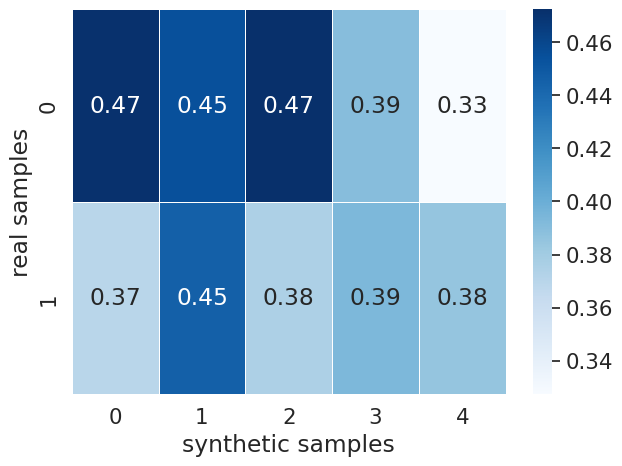

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cosine_sim(class1_real,class1_syn_discrete), 
            xticklabels = 1, yticklabels = 1,annot =True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

In [15]:
def plot_graph(G,classes):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.set_node_attributes(G, dict(zip(G.nodes(), classes)), 'class')

    nx.draw(G, 
        with_labels=True, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            #node_size=800,
        font_color='white')
    plt.show()

In [16]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [17]:
def compare_plot_node_type_dist(df):
    df_new = df.apply(pd.value_counts).T
    color=['blue','red','darkgreen','orange']
    ax=df_new.plot.bar(width=0.2,figsize=(7,7),color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#     for i in ax.containers:
#         ax.bar_label(i,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.legend(fontsize="20", loc ="lower center")
    plt.ylabel('no. of nodes',fontsize=20)
    plt.tight_layout()
    plt.show();

In [18]:
G_real = nx.read_gexf('../real_graphs/dblp/real_G20.gexf')

In [19]:
G_real.nodes(data=True)

NodeDataView({'0': {'node_type': 2, 'label': '0'}, '1': {'node_type': 0, 'label': '1'}, '2': {'node_type': 1, 'class': 3, 'label': '2'}, '3': {'node_type': 0, 'label': '3'}, '4': {'node_type': 0, 'label': '4'}, '5': {'node_type': 2, 'label': '5'}, '6': {'node_type': 2, 'label': '6'}, '7': {'node_type': 0, 'label': '7'}, '8': {'node_type': 0, 'label': '8'}, '9': {'node_type': 2, 'label': '9'}, '10': {'node_type': 0, 'label': '10'}, '11': {'node_type': 1, 'class': 0, 'label': '11'}, '12': {'node_type': 2, 'label': '12'}, '13': {'node_type': 2, 'label': '13'}, '14': {'node_type': 0, 'label': '14'}, '15': {'node_type': 3, 'label': '15'}, '16': {'node_type': 3, 'label': '16'}, '17': {'node_type': 2, 'label': '17'}, '18': {'node_type': 0, 'label': '18'}, '19': {'node_type': 0, 'label': '19'}})

In [20]:
print('classes of Author nodes', list(nx.get_node_attributes(G_real, "class").values()))

classes of Author nodes [3, 0]


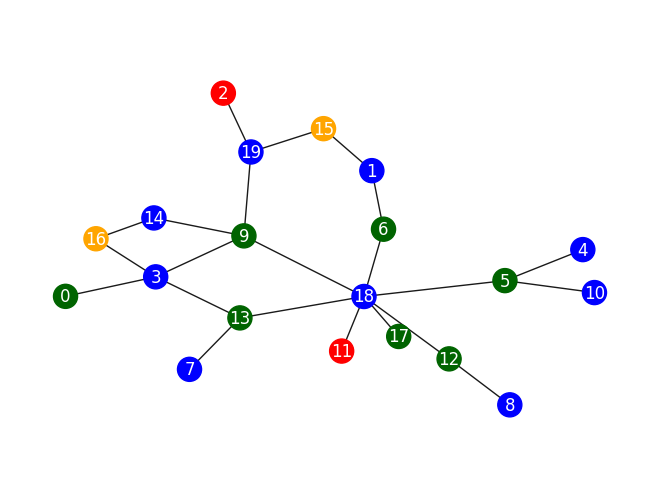

In [21]:
plot_graph(G_real,node_class_real)

In [22]:
G_syn = nx.read_gexf('../features/dblp/sync499949232950/sync499949232950_G20.gexf')

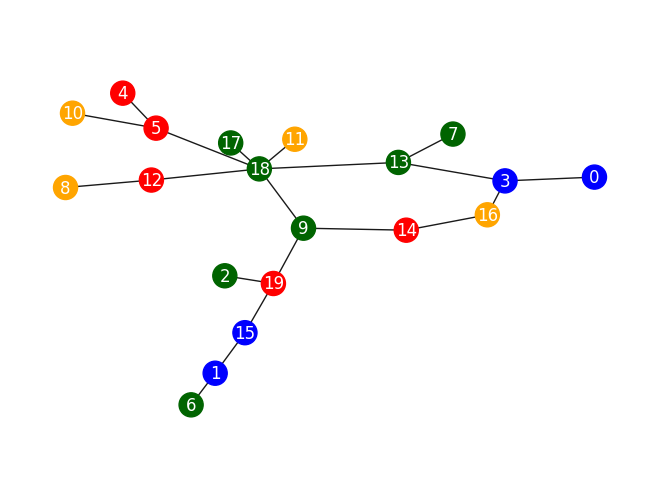

In [24]:
plot_graph(G_syn,node_class_syn)

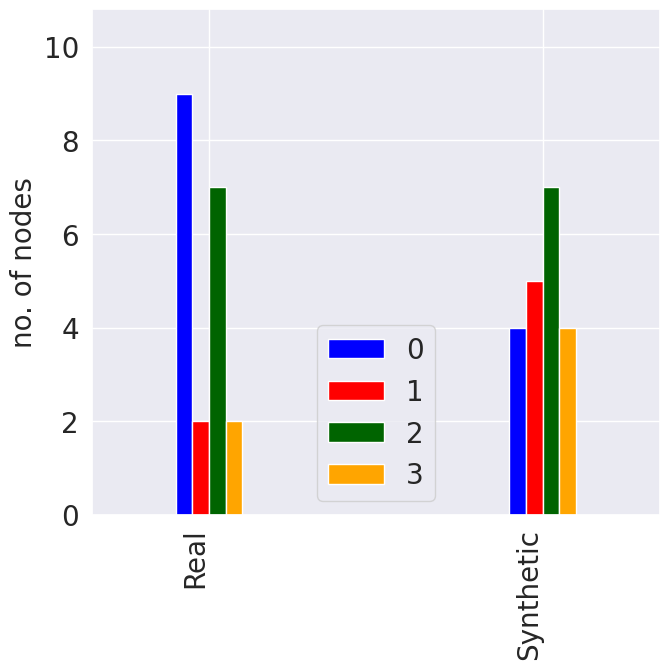

In [25]:
df_compare = pd.DataFrame()
df_compare['Real'] = list(node_class_real)
df_compare['Synthetic'] = list(node_class_syn)
compare_plot_node_type_dist(df_compare)